In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [417]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\Default.csv")

## Data Preparation

In [418]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [419]:
# Check for missing values
df.isna().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [420]:
# Check for duplicates
df.duplicated().sum()

0

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [422]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [423]:
# Change Data Type
for col in df:
    if pd.api.types.is_object_dtype(df[col]):
        df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   default  10000 non-null  category
 1   student  10000 non-null  category
 2   balance  10000 non-null  float64 
 3   income   10000 non-null  float64 
dtypes: category(2), float64(2)
memory usage: 176.1 KB


### Encoding Categorical Values

In [424]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df:
    if pd.api.types.is_categorical_dtype(df[col]):
        df[col] = le.fit_transform(df[col])

Collinearity

In [425]:
corr = df.corr()
corr.style.background_gradient(cmap="coolwarm")

,default,student,balance,income
default,1.000000,0.035420,0.350119,-0.019871
student,0.035420,1.000000,0.203578,-0.753985
balance,0.350119,0.203578,1.000000,-0.152243
income,-0.019871,-0.753985,-0.152243,1.000000


Feature Importance: Test for statistical significance

In [426]:
from scipy.stats import pearsonr

dg = pd.DataFrame(columns=['P-Value','R-Square'])

for col in df.columns[1:]:
    if pd.api.types.is_numeric_dtype(df[col]):
        r, p = pearsonr(df[col],df['default'])
    dg.loc[col] = [round(p,4), round(r,4)]
dg

,P-Value,R-Square
student,0.0004,0.0354
balance,0.0000,0.3501
income,0.0469,-0.0199


In [427]:
# normalization
# from sklearn.preprocessing import normalize #, StandardScaler

In [428]:
# df = pd.DataFrame(normalize(df.values), columns =df.columns).apply(lambda x:round(x,4))

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int32  
 1   student  10000 non-null  int32  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int32(2)
memory usage: 234.5 KB


In [430]:
df['default']

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default, Length: 10000, dtype: int32

percentage 0: 3.33
percentage 1: 96.67


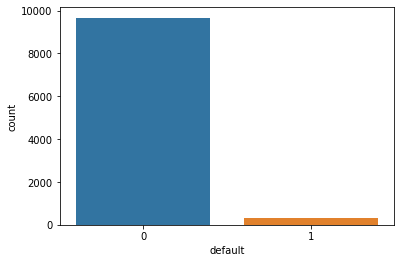

In [431]:
sns.countplot(data = df, x='default')

y0 = len(df[df['default']==1])
y1 = len(df[df['default']==0])

pery0 = (y0*100)/len(df)
pery1 = (y1*100)/len(df)
print(f"percentage 0: {pery0}")
print(f"percentage 1: {pery1}")

In [432]:
idx0 = np.random.choice(df[df['default']==0].index, size= 333,replace=False)
idx1 = df[df['default']==1].index
idx = np.hstack((idx0,idx1))

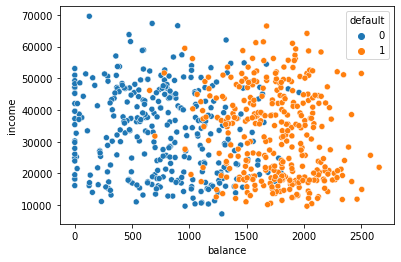

In [433]:
sns.scatterplot(data=df.loc[idx], x='balance',y='income',hue='default')
plt.show()

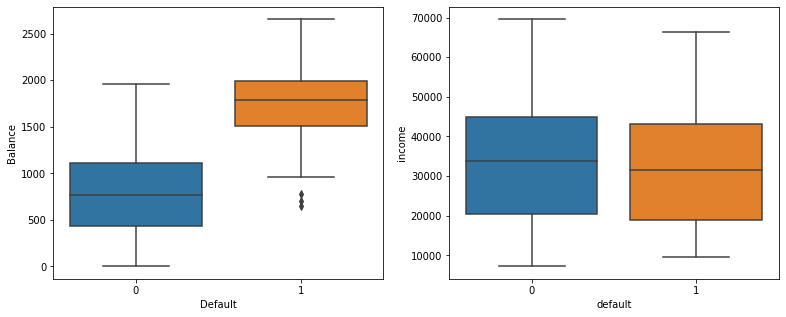

In [434]:
fig = plt.subplots(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(data=df.loc[idx], x='default',y='balance')
plt.xlabel('Default'), plt.ylabel('Balance')
plt.subplot(1,2,2)
sns.boxplot(data=df.loc[idx], x='default',y='income')
plt.show()

# Machine learning

In [435]:
from sklearn.model_selection import train_test_split

X = df.loc[idx,['student','balance','income']]
y = df.loc[idx,'default']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=2)

In [436]:
X.shape

(666, 3)

In [437]:
from sklearn.linear_model import LogisticRegression
lregr = LogisticRegression()
lregr.fit(X_train,y_train)
print(lregr.score(X_train,y_train))
# print(lregr.intercept_)
# print(lregr.coef_)
y_pred = lregr.predict(X_test)
# pd.DataFrame(np.transpose(lregr.coef_), index=X.columns, columns=['Beta Value'])
pd.DataFrame(np.vstack((np.array(lregr.intercept_),np.transpose(lregr.coef_))), index=X.columns.insert(0,['Intercept']), columns=['Beta Value'])


0.8590225563909775


,Beta Value
Intercept,-2.243626
student,-2.632259
balance,0.004518
income,-0.000080


Confusion matrix

 [[63 10]
 [ 5 56]]

True Positives(TP) =  63

True Negatives(TN) =  56

False Positives(FP) =  10

False Negatives(FN) =  5


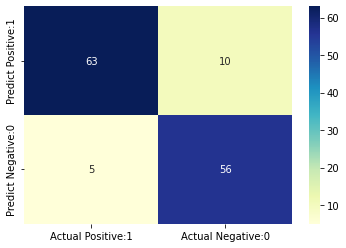

In [438]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# Visualizing the confusion matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

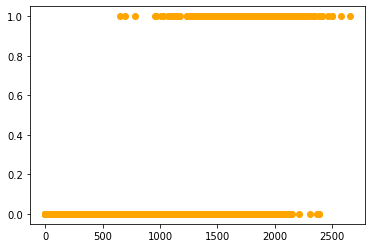

In [439]:
plt.scatter(x=df.balance, y=df.default, c='orange')
plt.show()

# KNN Classification

In [448]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))
# (knn.predict(X_train) == y_train).sum()/len(y_train)
print(knn.predict(X_train)[1:10])
print(knn.predict_proba(X_train)[1:10])

0.8283582089552238
[1 1 0 1 1 1 0 1 0]
[[0.25 0.75]
 [0.2  0.8 ]
 [0.65 0.35]
 [0.45 0.55]
 [0.15 0.85]
 [0.3  0.7 ]
 [0.6  0.4 ]
 [0.1  0.9 ]
 [0.55 0.45]]
